In [13]:
# Import libraries
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files


from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup
import csv

import geocoder # to get longitude and latitude

import folium # Map plotting library
import numpy as np
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans


In [14]:
# Extract data from website
source = requests.get('https://en.wikipedia.org/wiki/Category:Areas_of_Manchester').text 
soup = BeautifulSoup(source, 'lxml')

In [15]:
csv_file = open('manchester.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Neighbourhood'])

15

In [16]:
mwcg = soup.find_all(class_ = "mw-category-group")

length = len(mwcg) # Gets the length of number of `mw-category-groups` present

for i in range(1, length):  # Gets all the neighbourhoods
    lists = mwcg [i].find_all('a')
    for list in lists:
        nbd = list.get('title') # Gets the title of the neighbourhood
        csv_writer.writerow([nbd]) # Writes the name of the neighbourhood in the csv file

In [17]:

csv_file.close()

In [18]:
manchester_raw = pd.read_csv('manchester.csv')

In [22]:
manchester_raw.shape
manchester_raw


,Neighbourhood
0,Baguley
1,Barlow Moor
2,"Belle Vue, Manchester"
3,Benchill
4,"Beswick, Manchester"
5,Blackley
6,Bradford-with-Beswick
7,"Bradford, Manchester"
8,Brooklands (Manchester ward)
9,Burnage


In [23]:
# Initialize varialbes
lat = []
lng = []
lat_lng_coords = None

# Get postcodes from neighbourhoods table
neighbourhoods = manchester_raw['Neighbourhood']

# Store latitude and longitude values in lat and lng
for nh in neighbourhoods:
    g = geocoder.arcgis('{}, Manchester, UK'.format(nh))
    lat_lng_coords = g.latlng
    lat.append(lat_lng_coords[0])
    lng.append(lat_lng_coords[1])

In [24]:

man_data = manchester_raw
man_data['Latitude'] = lat
man_data['Longitude'] = lng

In [25]:
man_data.head()

,Neighbourhood,Latitude,Longitude
0,Baguley,53.399432,-2.294060
1,Barlow Moor,53.426562,-2.266241
2,"Belle Vue, Manchester",53.463060,-2.197180
3,Benchill,53.389117,-2.265841
4,"Beswick, Manchester",53.483804,-2.215091


# Credentials

In [26]:
CLIENT_ID = 'JW1LOUKCHOBJJGPYYZFROQZINFPN0AU4E44WNXM51NPILF3W' # your Foursquare ID
CLIENT_SECRET = 'QEEXIE4ODGP1UZVI35RD0OQL2XS2WQWE3ZNAQ3T4CMSOMZNJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JW1LOUKCHOBJJGPYYZFROQZINFPN0AU4E44WNXM51NPILF3W
CLIENT_SECRET:QEEXIE4ODGP1UZVI35RD0OQL2XS2WQWE3ZNAQ3T4CMSOMZNJ


In [27]:
# Get latitude and Longitude of Manchester
from geopy.geocoders import Nominatim

address = 'Manchester, UK'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manchester are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manchester are 53.4794892, -2.2451148.


In [28]:
# Plot map of Manchester using latitude and longitude values

man_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(man_data['Latitude'], man_data['Longitude'], man_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(man_map)  
    
man_map


In the following call we will create a function which will extract the category from the FourSquare vanues. Later we will apply FourSquare API in all the neighbourhoods on Mancheste

In [29]:

# Gets the name of the category

def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [30]:
explore_df_list = []

for i, nhood_name in enumerate(man_data['Neighbourhood']):  
    
    try :
        #Get neighbourhood data
        nhood_name = man_data.loc[i, 'Neighbourhood']
        nhood_lat = man_data.loc[i, 'Latitude']
        nhood_lng = man_data.loc[i, 'Longitude']

        radius = 1000 
        LIMIT = 30 

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nhood_lat, nhood_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results) # Flatten JSON

        # Filter the columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        # Rename the columns
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        # Get the categories
        nearby['Category'] = nearby.apply(get_category_type, axis=1)    

        # Get the required data
        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nhood_name, nhood_lat, nhood_lng] + s_list
            explore_df_list.append(f_list)
    
    except Exception as e:
        pass

<ipython-input-30-4decbc75657f>:21: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby = json_normalize(results) # Flatten JSON


Now we will create a dataframe for performing cluster

In [31]:
explore_man = pd.DataFrame([item for item in explore_df_list])
explore_man.columns = ['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
explore_man.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,Baguley,53.399432,-2.29406,Lidl,Supermarket,53.400455,-2.295649
1,Baguley,53.399432,-2.29406,B&M Store,Furniture / Home Store,53.401589,-2.299105
2,Baguley,53.399432,-2.29406,Aldi,Supermarket,53.401268,-2.299659
3,Baguley,53.399432,-2.29406,Costa Coffee,Coffee Shop,53.400795,-2.295027
4,Baguley,53.399432,-2.29406,Wickes,Hardware Store,53.402758,-2.298894


# one-hot encoding to analyze neighbourhoods of Manchester.

In [32]:
man_1hot = pd.get_dummies(explore_man[['Venue Category']], prefix="", prefix_sep="")


# Add neighbourhood column back to dataframe
man_1hot['Neighbourhood'] = explore_man['Neighbourhood'] 


# Move neighbourhood column to the first column
fixed_columns = [man_1hot.columns[-1]] + man_1hot.columns[:-1].values.tolist()
man_1hot = man_1hot[fixed_columns]

man_1hot.head()

,Neighbourhood,Airport Service,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Green,Brazilian Restaurant,Brewery,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Butcher,Café,Canal,Caribbean Restaurant,Casino,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Discount Store,Donut Shop,Duty-free Shop,Electronics Store,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food,Food & Drink Shop,Food Court,Forest,Fried Chicken Joint,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Gay Bar,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Hardware Store,Hotel,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Korean Restaurant,Lake,Lebanese Restaurant,Liquor Store,Lounge,Malay Restaurant,Market,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Venue,Nature Preserve,Newsagent,Outdoor Supply Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Platform,Plaza,Pool,Pop-Up Shop,Portuguese Restaurant,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,Sandwich Place,Science Museum,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Soccer Field,Soccer Stadium,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Track Stadium,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar
0,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


gregate the venues by neighbourhoods and later we will create a function to return most common venues

In [33]:
man_grouped = man_1hot.groupby('Neighbourhood').mean().reset_index()
man_grouped.head()

,Neighbourhood,Airport Service,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Green,Brazilian Restaurant,Brewery,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Butcher,Café,Canal,Caribbean Restaurant,Casino,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Discount Store,Donut Shop,Duty-free Shop,Electronics Store,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food,Food & Drink Shop,Food Court,Forest,Fried Chicken Joint,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Gay Bar,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Hardware Store,Hotel,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Korean Restaurant,Lake,Lebanese Restaurant,Liquor Store,Lounge,Malay Restaurant,Market,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Venue,Nature Preserve,Newsagent,Outdoor Supply Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Platform,Plaza,Pool,Pop-Up Shop,Portuguese Restaurant,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,Sandwich Place,Science Museum,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Soccer Field,Soccer Stadium,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Track Stadium,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar
0,Baguley,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.133333,0.000000,0.066667,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.066667,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.066667,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.066667,0.0,0.0,0.0,0.066667,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.066667,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.200000,0.0,0.0,0.0,0.000000,0.0,0.0
1,Barlow Moor,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.071429,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.071429,0.000000,0.0,0.0,0.0,0.0,0.071429,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.142857,0.071429,0.000000,0.0,0.0,0.0,0.000000,0.071429,0.071429,0.000000,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.071429,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.071429,0.071429,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.071429,0.0,0.0,0.0,0.000000,0.0,0.0
2,"Belle Vue, Manchester",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000

In [34]:
def top_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

 create a new dataframe to get the top 10 venues

In [35]:
top_venues = 10
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = man_grouped['Neighbourhood']

for ind in np.arange(man_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = top_common_venues(man_grouped.iloc[ind, :], top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baguley,Tram Station,Supermarket,Clothing Store,Hardware Store,Fast Food Restaurant,Gym / Fitness Center,Donut Shop,Coffee Shop,Furniture / Home Store,Pet Store
1,Barlow Moor,Grocery Store,Indian Restaurant,Gym,Park,Outdoor Supply Store,Fast Food Restaurant,Bus Station,Middle Eastern Restaurant,Golf Course,Forest
2,"Belle Vue, Manchester",Supermarket,Convenience Store,Discount Store,Dessert Shop,Movie Theater,Restaurant,Pharmacy,Bus Stop,Park,Market
3,Benchill,Tram Station,Pub,Supermarket,Market,Bus Station,Bakery,Bus Stop,Pizza Place,Platform,Pie Shop
4,"Beswick, Manchester",Coffee Shop,Bar,Italian Restaurant,Beer Bar,Soccer Stadium,Cocktail Bar,Fish & Chips Shop,Brewery,Grocery Store,Tea Room


apply K-means clustering on the dataframe.

In [36]:
man_grouped_clustering = man_grouped.drop('Neighbourhood', 1)

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [38]:
max_range = 15 #Max range 15 (number of clusters)

from sklearn.metrics import silhouette_samples, silhouette_score


indices = []
scores = []

for man_clusters in range(2, max_range) :
    
    # Run k-means clustering
    man_gc = man_grouped_clustering
    kmeans = KMeans(n_clusters = man_clusters, init = 'k-means++', random_state = 0).fit_predict(man_gc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(man_gc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(man_clusters)
    scores.append(score)

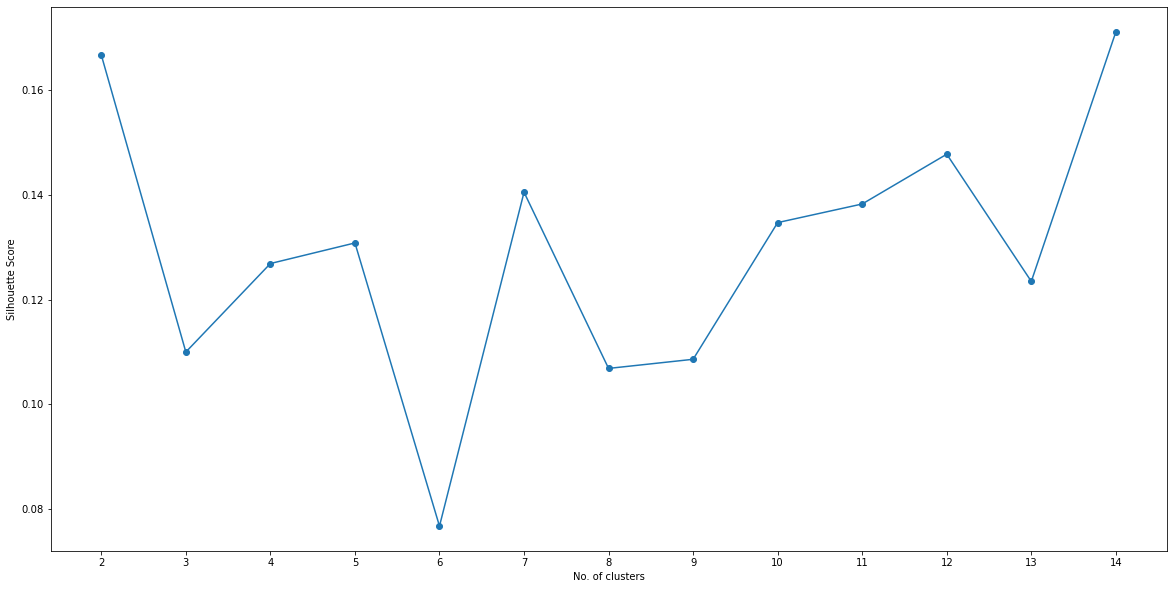

In [39]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

From the graph the optimal number is found to be 8 using the Elbow Method

In [40]:

opt_value = 8

we have calculated out optimum value of clusters, we can proceed with K-Means clustering

In [42]:
man_clusters = opt_value

# Run k-means clustering
man_gc = man_grouped_clustering
kmeans = KMeans(n_clusters = man_clusters, init = 'k-means++', random_state = 0).fit(man_gc)

In [43]:
# Add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

 crate a final version of dataframe containing all the necessary data

In [44]:

man_final = man_data
man_final = man_final.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
man_final.dropna(inplace = True)
man_final['Cluster Labels'] = man_final['Cluster Labels'].astype(int)
man_final.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baguley,53.399432,-2.294060,2,Tram Station,Supermarket,Clothing Store,Hardware Store,Fast Food Restaurant,Gym / Fitness Center,Donut Shop,Coffee Shop,Furniture / Home Store,Pet Store
1,Barlow Moor,53.426562,-2.266241,5,Grocery Store,Indian Restaurant,Gym,Park,Outdoor Supply Store,Fast Food Restaurant,Bus Station,Middle Eastern Restaurant,Golf Course,Forest
2,"Belle Vue, Manchester",53.463060,-2.197180,5,Supermarket,Convenience Store,Discount Store,Dessert Shop,Movie Theater,Restaurant,Pharmacy,Bus Stop,Park,Market
3,Benchill,53.389117,-2.265841,4,Tram Station,Pub,Supermarket,Market,Bus Station,Bakery,Bus Stop,Pizza Place,Platform,Pie Shop
4,"Beswick, Manchester",53.483804,-2.215091,7,Coffee Shop,Bar,Italian Restaurant,Beer Bar,Soccer Stadium,Cocktail Bar,Fish & Chips Shop,Brewery,Grocery Store,Tea Room


visualize the clusters using Folium.

In [45]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Setup color scheme for different clusters
x = np.arange(man_clusters)
ys = [i + x + (i*x)**2 for i in range(man_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(man_final['Latitude'], man_final['Longitude'], man_final['Neighbourhood'], 
                                  man_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

look at all four clusters

In [46]:
val = 1
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Didsbury,Pub,Italian Restaurant,Park,Indian Restaurant,Hotel,Bar,Wine Bar,Tea Room,Coffee Shop,Fish & Chips Shop
26,Great Heaton,Pub,Italian Restaurant,Coffee Shop,Park,Pet Store,Nature Preserve,Newsagent,Outdoor Supply Store,Pastry Shop,Performing Arts Venue
27,Green Quarter,Pub,Italian Restaurant,Bar,Indian Restaurant,Deli / Bodega,Restaurant,Café,Boutique,Persian Restaurant,Pizza Place
33,Levenshulme,Indian Restaurant,Grocery Store,Café,Fast Food Restaurant,Antique Shop,Pub,Farmers Market,Gym / Fitness Center,Park,Sandwich Place
44,Northenden,Golf Course,Pub,Bus Stop,Vietnamese Restaurant,Café,Middle Eastern Restaurant,Park,Sandwich Place,Performing Arts Venue,Newsagent
47,Old Moat,Pub,Italian Restaurant,Restaurant,Indian Restaurant,Café,Vegetarian / Vegan Restaurant,Bus Stop,Grocery Store,Fish & Chips Shop,Pool
48,Old Moat (ward),Pub,Italian Restaurant,Restaurant,Indian Restaurant,Café,Vegetarian / Vegan Restaurant,Bus Stop,Grocery Store,Fish & Chips Shop,Pool
50,Parrs Wood,Pub,Italian Restaurant,Park,Hotel,Bar,Supermarket,Grocery Store,Shopping Plaza,Movie Theater,Fish & Chips Shop
61,Withington,Pub,Italian Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Café,Grocery Store,Indian Restaurant,Middle Eastern Restaurant,Park,Fish & Chips Shop


In [47]:
val = 2
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Bradford-with-Beswick,Athletics & Sports,Tram Station,Track Stadium,Thai Restaurant,Tennis Court,Soccer Stadium,Sporting Goods Shop,Sandwich Place,Restaurant,Fast Food Restaurant
7,"Bradford, Manchester",Athletics & Sports,Tram Station,Track Stadium,Thai Restaurant,Tennis Court,Soccer Stadium,Sporting Goods Shop,Sandwich Place,Restaurant,Fast Food Restaurant
37,Miles Platting,Thai Restaurant,Men's Store,Tram Station,Canal,Tennis Court,Airport Service,Music Venue,Nature Preserve,Newsagent,Outdoor Supply Store
43,Newton Heath,Supermarket,Bus Stop,Gymnastics Gym,Athletics & Sports,Fast Food Restaurant,Tram Station,Park,Shoe Store,Pastry Shop,Music Venue


In [48]:
val = 3
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baguley,Tram Station,Supermarket,Clothing Store,Hardware Store,Fast Food Restaurant,Gym / Fitness Center,Donut Shop,Coffee Shop,Furniture / Home Store,Pet Store
12,"Cheetham, Manchester",Brewery,Fast Food Restaurant,Clothing Store,Coffee Shop,Grocery Store,Pizza Place,Concert Hall,Soccer Field,Museum,Furniture / Home Store
20,Collyhurst,Coffee Shop,Clothing Store,Tram Station,Concert Hall,Men's Store,Pharmacy,Park,Fast Food Restaurant,Shopping Plaza,Soccer Field
21,Crumpsall,Coffee Shop,Tram Station,Halal Restaurant,Fast Food Restaurant,Supermarket,Café,Grocery Store,Pharmacy,Sandwich Place,Pastry Shop
42,Newall Green,Coffee Shop,Pub,Tram Station,Business Service,Furniture / Home Store,Newsagent,Sandwich Place,Convenience Store,Bus Stop,Platform
45,Northern Moor,Grocery Store,Convenience Store,Soccer Field,Fast Food Restaurant,Park,Lebanese Restaurant,Gym / Fitness Center,Tram Station,Bowling Green,Electronics Store
51,"Peel Hall, Wythenshawe",Tram Station,Discount Store,Fast Food Restaurant,Bakery,Hotel,Market,Coffee Shop,Fish & Chips Shop,Supermarket,Tanning Salon
54,"Smedley, Manchester",Coffee Shop,Fast Food Restaurant,Clothing Store,Tram Station,Pharmacy,Sandwich Place,Furniture / Home Store,Men's Store,Shopping Plaza,Grocery Store
57,"Strangeways, Manchester",Coffee Shop,Clothing Store,Grocery Store,Pizza Place,Brewery,Fast Food Restaurant,Shopping Plaza,Park,Casino,Climbing Gym
62,Woodhouse Park,Coffee Shop,Restaurant,Bus Station,Business Service,Hotel,Discount Store,Tram Station,Sandwich Place,Tanning Salon,Rental Car Location


In [49]:
val = 4
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Burnage,Train Station,Grocery Store,Supermarket,Pizza Place,Indian Restaurant,Gym / Fitness Center,Bus Station,Toy / Game Store,Golf Course,Park
10,Burnage (ward),Train Station,Grocery Store,Supermarket,Pizza Place,Indian Restaurant,Gym / Fitness Center,Bus Station,Toy / Game Store,Golf Course,Park
19,"Clayton, Manchester",Tram Station,Supermarket,Pub,Discount Store,Shopping Mall,Gym / Fitness Center,Gym,Grocery Store,Coffee Shop,Clothing Store
25,Gorton,Train Station,Go Kart Track,Market,Movie Theater,Gymnastics Gym,Racetrack,Gym,Discount Store,Bakery,Supermarket
34,Longsight,Indian Restaurant,Supermarket,Grocery Store,Park,Convenience Store,Sports Club,Café,Turkish Restaurant,Electronics Store,Pastry Shop
41,New Moston,Supermarket,Pub,Train Station,Malay Restaurant,Pizza Place,Convenience Store,Coffee Shop,Soccer Stadium,Hotel,Tram Station
49,Openshaw,Supermarket,Coffee Shop,Clothing Store,Go Kart Track,Farmers Market,Grocery Store,Gym,Gym / Fitness Center,Train Station,Tram Station
53,Sharston,Airport Service,Bus Station,Supermarket,Tram Station,Performing Arts Venue,Music Venue,Nature Preserve,Newsagent,Outdoor Supply Store,Park


In [50]:
val = 5
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Benchill,Tram Station,Pub,Supermarket,Market,Bus Station,Bakery,Bus Stop,Pizza Place,Platform,Pie Shop
63,Wythenshawe,Pub,Bus Stop,Boat or Ferry,Tram Station,Persian Restaurant,Nature Preserve,Newsagent,Outdoor Supply Store,Park,Pastry Shop


In [51]:
val = 6
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barlow Moor,Grocery Store,Indian Restaurant,Gym,Park,Outdoor Supply Store,Fast Food Restaurant,Bus Station,Middle Eastern Restaurant,Golf Course,Forest
2,"Belle Vue, Manchester",Supermarket,Convenience Store,Discount Store,Dessert Shop,Movie Theater,Restaurant,Pharmacy,Bus Stop,Park,Market
5,Blackley,Hotel,Coffee Shop,Grocery Store,Park,Persian Restaurant,Music Venue,Nature Preserve,Newsagent,Outdoor Supply Store,Pastry Shop
8,Brooklands (Manchester ward),Asian Restaurant,Hotel,Plaza,Italian Restaurant,Concert Hall,Bar,Wine Bar,Bookstore,Pizza Place,Sandwich Place
14,Chorlton Park (ward),Indian Restaurant,Grocery Store,Park,Pizza Place,Tram Station,Cosmetics Shop,Café,Coffee Shop,Restaurant,Pub
23,Fallowfield,Pub,Bar,Supermarket,Gym / Fitness Center,Asian Restaurant,Park,Fast Food Restaurant,Coffee Shop,Sandwich Place,Middle Eastern Restaurant
24,"Glenbrook, Greater Manchester",Asian Restaurant,Hotel,Plaza,Italian Restaurant,Concert Hall,Bar,Wine Bar,Bookstore,Pizza Place,Sandwich Place
30,Highfield Country Park,Gym,Grocery Store,Fast Food Restaurant,English Restaurant,Italian Restaurant,Café,Pizza Place,Supermarket,Bakery,Bar
32,Ladybarn,Pub,Bar,Asian Restaurant,Hotel,Park,Fast Food Restaurant,Grocery Store,Racetrack,Greek Restaurant,Pizza Place
36,Merseybank,Hotel,Grocery Store,Outdoor Supply Store,Fast Food Restaurant,Bus Station,Forest,Middle Eastern Restaurant,Golf Course,Indian Restaurant,Lake


In [52]:
val = 7
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Harpurhey,Hotel,Building,Gym / Fitness Center,Supermarket,Tram Station,Flea Market,Park,Pastry Shop,Museum,Music Venue
39,"Moston, Manchester",Hotel,Building,Supermarket,Park,Flea Market,Gym / Fitness Center,Platform,Pizza Place,Pie Shop,Pharmacy


In [53]:
val = 8
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,"Beswick, Manchester",Coffee Shop,Bar,Italian Restaurant,Beer Bar,Soccer Stadium,Cocktail Bar,Fish & Chips Shop,Brewery,Grocery Store,Tea Room
11,Castlefield,Pub,Hotel,Bar,Steakhouse,Science Museum,Cocktail Bar,Concert Hall,Restaurant,Japanese Restaurant,Coffee Shop
13,Chorlton (ward),Pizza Place,Bar,Café,Deli / Bodega,Park,Coffee Shop,Tapas Restaurant,Nature Preserve,Spanish Restaurant,Restaurant
15,Chorlton-cum-Hardy,Bar,Pizza Place,Café,Restaurant,Coffee Shop,Pub,Thai Restaurant,Cocktail Bar,Gastropub,Falafel Restaurant
16,Chorlton-on-Medlock,Pizza Place,Bar,Café,Deli / Bodega,Park,Coffee Shop,Tapas Restaurant,Nature Preserve,Spanish Restaurant,Restaurant
17,Chorltonville,Pizza Place,Bar,Café,Deli / Bodega,Park,Coffee Shop,Tapas Restaurant,Nature Preserve,Spanish Restaurant,Restaurant
18,Circle Square Manchester,Pub,Bar,Coffee Shop,Hotel,Café,Fast Food Restaurant,Monument / Landmark,Gay Bar,Museum,Park
28,"Greenheys, Manchester",Music Venue,Café,Chinese Restaurant,Pub,Coffee Shop,Bar,Grocery Store,Performing Arts Venue,Fast Food Restaurant,Tanning Salon
31,Hulme,Pub,Bar,Café,Indian Restaurant,Hotel,Coffee Shop,Mini Golf,Pop-Up Shop,Concert Hall,Restaurant
35,Manchester city centre,Pub,Coffee Shop,Arts & Crafts Store,Café,Bar,Tea Room,Jazz Club,Pie Shop,Food Court,Butcher


it is recommended to the client that neighbourhoods such as Barlow Moor, Brookelands and Hyde Newton(Ward)  in cluster 4 are  good locations for opening a restaurant. The client can  make a decision.  Other factors like availability and legal requirements that are out of scope of this project